In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
file_path = '/Users/qbs/games.csv'
data = pd.read_csv(file_path)
# Selecting numerical features for PCA
# Assuming the dataset structure is similar to the previous one, selecting the same features
numerical_features = ['Peak CCU', 'Required age', 'Price', 'DLC count']
numerical_data = data[numerical_features]

# Handling missing values - replacing them with the mean of each column
numerical_data = numerical_data.fillna(numerical_data.mean())

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Checking the shape of the array
print('Shape of scaled_data:', scaled_data.shape)

# Viewing the first few rows of the array
print('First few rows of scaled_data:\n', scaled_data[:5])

# Checking for NaN values in the array
if np.isnan(scaled_data).any():
    print('There are NaN values in the array.')
else:
    print('There are no NaN values in the array.')




Shape of scaled_data: (71716, 4)
First few rows of scaled_data:
 [[-0.02428188 -0.14541813  1.15308668 -0.04121048]
 [-0.02428188 -0.14541813 -0.56295789 -0.04121048]
 [-0.02428188 -0.14541813 -0.20168535 -0.04121048]
 [-0.02428188 -0.14541813 -0.11136721 -0.04121048]
 [-0.02428188 -0.14541813 -0.65237284 -0.04121048]]
There are no NaN values in the array.


In [7]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
conda update scikit-learn


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /Users/qbs/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-23.1.0               |  py310hecd8cb5_0         145 KB
    beautifulsoup4-4.12.2      |  py310hecd8cb5_0         218 KB
    brotli-python-1.0.9        |  py310he9d5cce_7         359 KB
    ca-certificates-2023.08.22 |       hecd8cb5_0         124 KB
    certifi-2023.11.17         |  py310hecd8cb5_0         159 KB
    cffi-1.16.0                |  py310h6c40b1e_0         242 KB

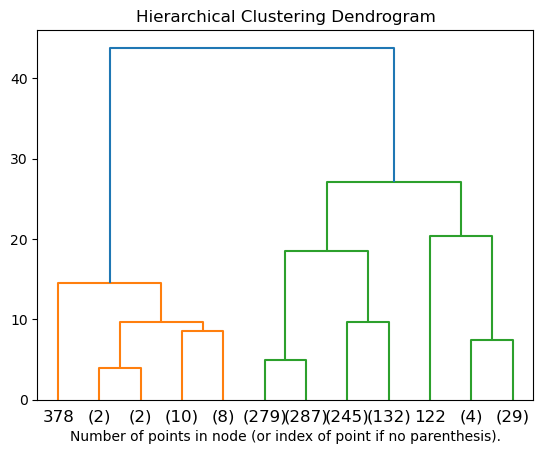

In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Performing Agglomerative Clustering
# Here we'll use a sample of data to make it computationally feasible
sample_indices = np.random.choice(scaled_data.shape[0], size=1000, replace=False)
sample_data = scaled_data[sample_indices]

agglo_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
agglo_cluster.fit(sample_data)

# Creating a Dendrogram (for visualization)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo_cluster, truncate_mode='level', p=3)  # Show only the last p merged clusters
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



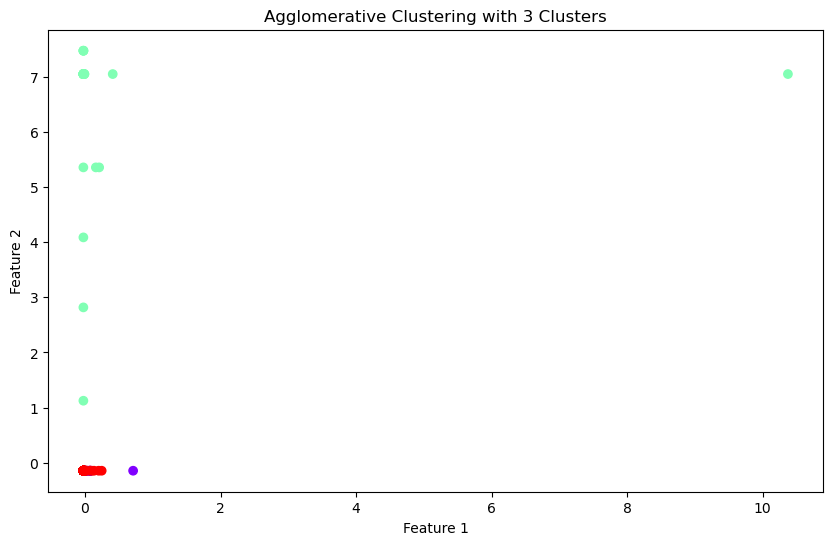

In [3]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sample_data' is your preprocessed data ready for clustering
n_clusters = 3  # Number of clusters determined from the dendrogram
agglo_model = AgglomerativeClustering(n_clusters=n_clusters)
agglo_model.fit(sample_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=agglo_model.labels_, cmap='rainbow')
plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
